In [1]:
import os
import itertools
import h5py
import keras
import numpy as np
import pandas as pd
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.models import Sequential
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from google.colab import drive
import joblib
from keras.layers.convolutional import Conv1D
from keras.layers import BatchNormalization
from keras.layers.convolutional import MaxPooling1D

drive.mount('/content/gdrive')

Mounted at /content/gdrive


Toplam veri sayısı: 3375
Kullanılan veri sayısı: 3375
Train veri sayısı: 2429
Validation veri sayısı: 608
Test veri sayısı: 338
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 99, 32)            160       
                                                                 
 batch_normalization (BatchN  (None, 99, 32)           128       
 ormalization)                                                   
                                                                 
 max_pooling1d (MaxPooling1D  (None, 33, 32)           0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 1056)              0         
                                                                 
 dense (Dense)               (None, 512)               54118

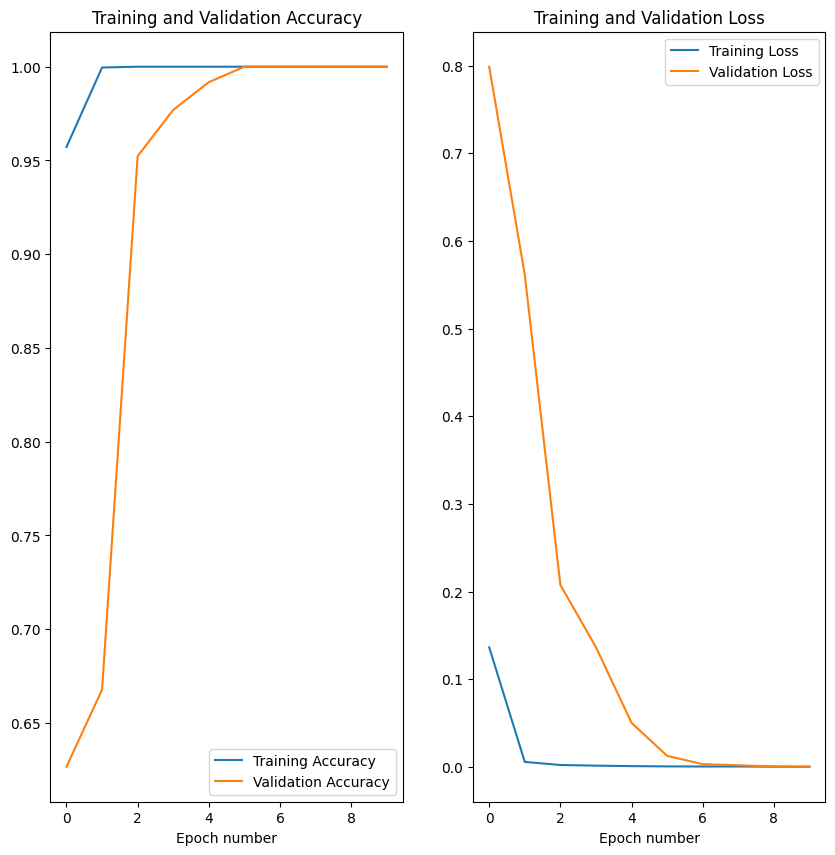

11/11 [==============================] - 0s 6ms/step


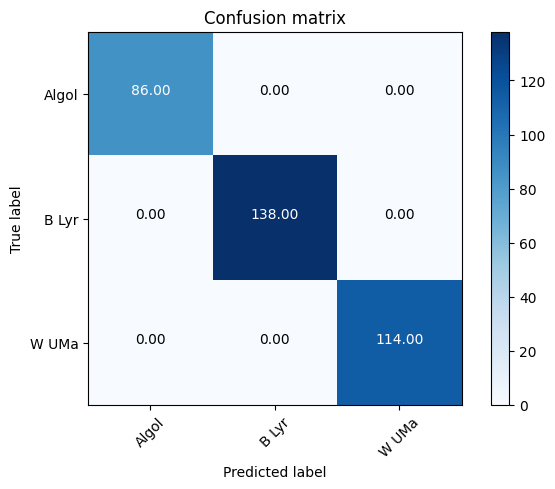

In [3]:
path_Algol = '/content/gdrive/MyDrive/Doktora/Python/Algol_Noisy'
Algol_files = [os.path.join(path_Algol, f) for f in os.listdir(path_Algol) if f.endswith('.txt')]
data_Algol = []
labels_Algol = []

for file in Algol_files:
  labels_Algol.append(0)#"Algol")
  fileContent = []
  with open(file, 'r') as f:
        lines = f.readlines()
        for line in lines:
            # Satırları ayrıştırın ve x, y koordinatlarını depolayın
            x, y = line.strip().split('\t')
            fileContent.append([float(x), float(y)])
  data_Algol.append(fileContent)

path_Beta_Lyrae = '/content/gdrive/MyDrive/Doktora/Python/Beta_Lyrae_Noisy'
Beta_Lyrae_files = [os.path.join(path_Beta_Lyrae, f) for f in os.listdir(path_Beta_Lyrae) if f.endswith('.txt')]
data_Beta_Lyrae = []
labels_Beta_Lyrae = []

for file in Beta_Lyrae_files:
  labels_Beta_Lyrae.append(1)#"B Lyr")
  fileContent = []
  with open(file, 'r') as f:
        lines = f.readlines()
        for line in lines:
            # Satırları ayrıştırın ve x, y koordinatlarını depolayın
            x, y = line.strip().split('\t')
            fileContent.append([float(x), float(y)])
  data_Beta_Lyrae.append(fileContent)

path_W_UMa = '/content/gdrive/MyDrive/Doktora/Python/W_UMa_Noisy'
W_UMa_files = [os.path.join(path_W_UMa, f) for f in os.listdir(path_W_UMa) if f.endswith('.txt')]
data_W_UMa = []
labels_W_UMa = []

for file in W_UMa_files:
  labels_W_UMa.append(2)#"W UMa")
  fileContent = []
  with open(file, 'r') as f:
        lines = f.readlines()
        for line in lines:
            # Satırları ayrıştırın ve x, y koordinatlarını depolayın
            x, y = line.strip().split('\t')
            fileContent.append([float(x), float(y)])
  data_W_UMa.append(fileContent)

# Verileri ve etiketleri numpy dizilerine dönüştürün
data = np.array(data_Algol+data_Beta_Lyrae+data_W_UMa)
labels = np.array(labels_Algol+labels_Beta_Lyrae+labels_W_UMa)
print("Toplam veri sayısı: " + str(data.shape[0]))

# images, images_void, labels, labels_void = train_test_split(images, labels, test_size=0.1, train_size=0.9) # verinin bir kısmını kullanmak istersek
print("Kullanılan veri sayısı: " + str(data.shape[0]))
images_TrainValidation, images_test, labels_TrainValidation, labels_test = train_test_split(data, labels, test_size=0.1)
images_train, images_validation, labels_train, labels_validation = train_test_split(images_TrainValidation, labels_TrainValidation, test_size=0.2)
print("Train veri sayısı: " + str(images_train.shape[0]))
print("Validation veri sayısı: " + str(images_validation.shape[0]))
print("Test veri sayısı: " + str(images_test.shape[0]))

epochs = 10
"""
# Model1
model = Sequential()
model.add(Flatten(input_shape=(100, 2)))
model.add(Dense(100, activation=keras.layers.LeakyReLU(alpha=0.3)))
model.add(Dropout(0.5))
model.add(Dense(50, activation=keras.layers.LeakyReLU(alpha=0.3)))
model.add(Dropout(0.3))
model.add(Dense(3, activation="softmax"))
"""

# Model2
model = Sequential([
    Conv1D(32, 2, activation='relu', input_shape=(100, 2)),
    BatchNormalization(),
    MaxPooling1D(pool_size=(3)),

    Flatten(),
    Dense(512, activation='relu'),
    Dense(3, activation='softmax')
])

"""
# Model3
model = Sequential()
model.add(Conv1D(32, 3, padding="same", activation="relu", input_shape=(100, 2)))
model.add(MaxPooling1D())

model.add(Conv1D(32, 3, padding="same", activation="relu"))
model.add(MaxPooling1D())

model.add(Conv1D(64, 3, padding="same", activation="relu"))
model.add(MaxPooling1D())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(3, activation="relu"))
"""


model.compile(loss="sparse_categorical_crossentropy", optimizer='adam', metrics=["acc"])
model.summary()
# model.save(model, save_format="h5") # modeli diske kaydetme

history = model.fit(images_train, labels_train, epochs=epochs, validation_data=[images_validation, labels_validation])
# (eval_loss, eval_accuracy) = model.evaluate(images_validation, labels_validation, batch_size=1000, verbose=1)

joblib.dump(model, "/content/gdrive/MyDrive/Doktora/Python/NN.joblib")

# Training ve validation grafiği
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.plot(range(epochs), history.history["acc"], label='Training Accuracy')
plt.plot(range(epochs), history.history["val_acc"], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel("Epoch number")
plt.subplot(1, 2, 2)
plt.plot(range(epochs), history.history["loss"], label='Training Loss')
plt.plot(range(epochs), history.history["val_loss"], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel("Epoch number")
plt.show()

predictions = model.predict(images_test)
confusion_matrix = confusion_matrix(labels_test, pd.DataFrame(predictions).idxmax(axis=1))
class_names = ['Algol', 'B Lyr', 'W UMa']
# Confusion matrix grafiği
plt.imshow(confusion_matrix, interpolation="nearest", cmap=plt.cm.Blues)
plt.title("Confusion matrix")
plt.colorbar()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
thresh = confusion_matrix.max() / 2.
for i, j in itertools.product(range(confusion_matrix.shape[0]), range(confusion_matrix.shape[1])):
    plt.text(j, i, format(confusion_matrix[i, j], ".2f"), horizontalalignment="center", color="white" if confusion_matrix[i, j] > thresh else "black")
plt.tight_layout()
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.show()


In [4]:
import numpy as np
from sklearn.preprocessing import StandardScaler
import joblib

file1 = '/content/gdrive/MyDrive/Doktora/Python/Algol_test/algol1203.txt'
file2 = '/content/gdrive/MyDrive/Doktora/Python/Algol_test/algol1202.txt'
file3 = '/content/gdrive/MyDrive/Doktora/Python/Beta_Lyrae_test/beta_lyrae1603.txt'
file4 = '/content/gdrive/MyDrive/Doktora/Python/Beta_Lyrae_test/beta_lyrae1602.txt'
file5 = '/content/gdrive/MyDrive/Doktora/Python/W_UMa_test/w_uma1623.txt'
file6 = '/content/gdrive/MyDrive/Doktora/Python/W_UMa_test/w_uma1622.txt'

data_test = []
fileContent = []
  
with open(file1, 'r') as f:
        lines = f.readlines()
        for line in lines:
            # Satırları ayrıştırın ve x, y koordinatlarını depolayın
            x, y = line.strip().split('\t')
            fileContent.append([float(y), float(y)])
data_test.append(fileContent)

fileContent = []
  
with open(file4, 'r') as f:
        lines = f.readlines()
        for line in lines:
            # Satırları ayrıştırın ve x, y koordinatlarını depolayın
            x, y = line.strip().split('\t')
            fileContent.append([float(y), float(y)])
data_test.append(fileContent)

fileContent = []

with open(file2, 'r') as f:
        lines = f.readlines()
        for line in lines:
            # Satırları ayrıştırın ve x, y koordinatlarını depolayın
            x, y = line.strip().split('\t')
            fileContent.append([float(y), float(y)])
data_test.append(fileContent)

data_test = np.array(data_test)

loadedModel = joblib.load("/content/gdrive/MyDrive/Doktora/Python/NN.joblib")

loadedModel.predict(data_test)

FileNotFoundError: ignored